# Shortest paths

This notebook illustrates the search for [shortest paths](https://en.wikipedia.org/wiki/Shortest_path_problem).

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import miserables, painters, movie_actor
from sknetwork.connectivity import shortest_path
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.utils import bipartite2undirected

## Graphs

In [4]:
graph = miserables(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [5]:
napoleon = 1
valjean = 11
seeds = [napoleon, valjean]

In [6]:
distances = shortest_path(adjacency, indices=seeds)

In [7]:
image = svg_graph(adjacency, position, names, scores = -distances[0].astype(int), seeds=[seeds[0]], scale = 1.5)

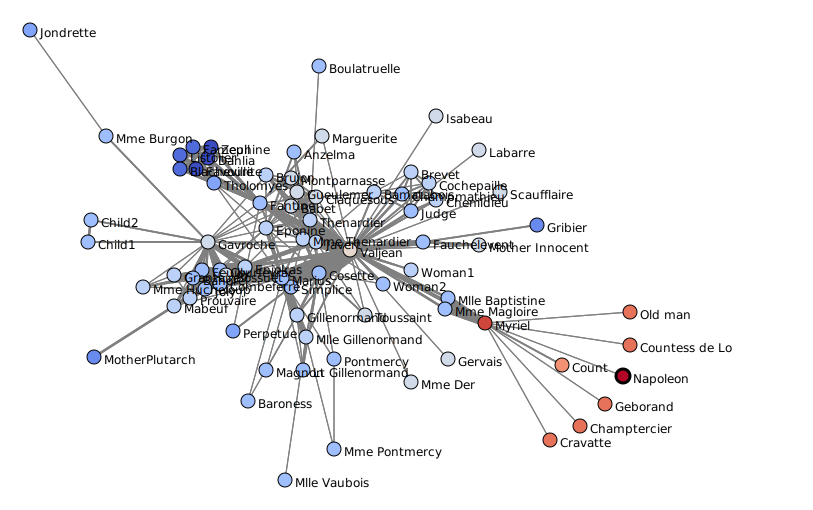

In [8]:
SVG(image)

In [9]:
image = svg_graph(adjacency, position, names, scores = -distances[1].astype(int), seeds=[seeds[1]], scale = 1.5)

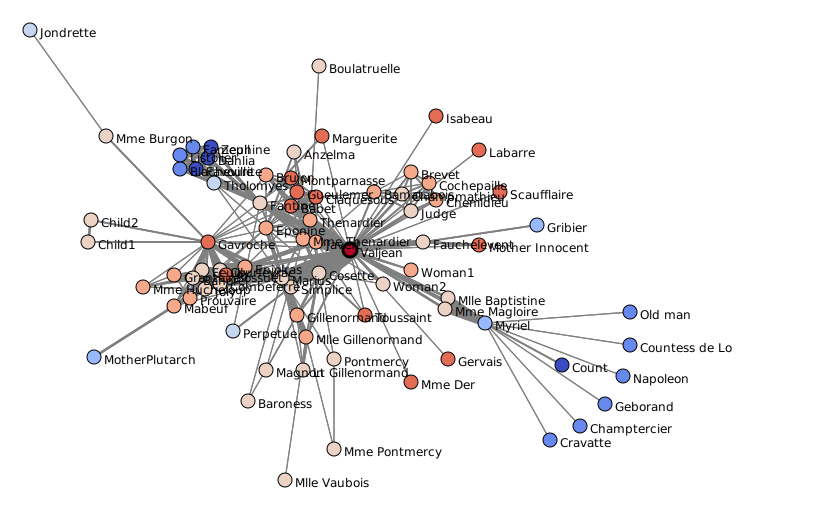

In [10]:
SVG(image)

## Digraphs

In [11]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [12]:
cezanne = 11

In [13]:
distances = shortest_path(adjacency, indices=[cezanne])

In [14]:
image = svg_digraph(adjacency, position, names, labels=distances[0].astype(int), seeds=[cezanne])

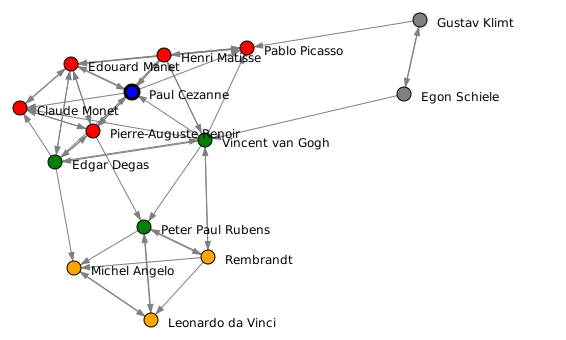

In [15]:
SVG(image)

## Bigraphs

In [16]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [17]:
adjacency = bipartite2undirected(biadjacency)

In [18]:
n_row, _ = biadjacency.shape

In [19]:
cotillard = 1
seeds_col=[cotillard]

In [20]:
distances = shortest_path(adjacency, indices=np.array(seeds_col) + n_row)

In [21]:
image = svg_bigraph(biadjacency, names_row, names_col,
                    scores_col=-distances[0][n_row:], seeds_col=seeds_col)

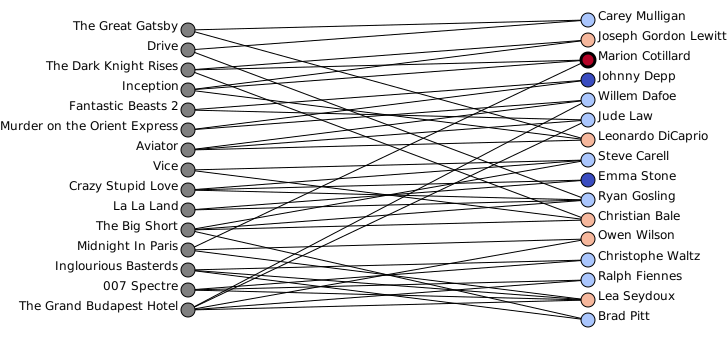

In [22]:
SVG(image)